In [1]:
library(dplyr)
dat <- read.csv('mice_pheno.csv')

controlPop <- filter(dat, Sex=='F' & Diet=='chow') %>% select(Bodyweight) %>% unlist

hfPop <- filter(dat, Sex=='F' & Diet=='hf') %>% select(Bodyweight) %>% unlist

mu_hf <- mean(hfPop)
mu_control <- mean(controlPop)
mu_hf - mu_control


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 2.375517

In [3]:
((mu_hf-mu_control)/mu_control) * 100

[1] 9.942157

In [4]:
#the mean of the high fat diet female mice is almost 10% higher than
#the mean of the control diet mice population

In [5]:
#check statistical significance with t-test
set.seed(1)
N <- 5
hf <- sample(hfPop, N)
control <- sample(controlPop, N)
t.test(hf,control)$p.value

[1] 0.1410204

In [6]:
#while we are rejecting null, the issue here is Power
N <- 12
alpha <- 0.05
B <- 2000
reject <- function(N, alpha=0.05){
    hf <- sample(hfPop,N)
    control <- sample(controlPop, N)
    pval <- t.test(hf,control)$p.value
    pval < alpha
}

In [7]:
reject(12)

[1] FALSE

In [9]:
rejections <-replicate(B,reject(N))

In [10]:
mean(rejections)

[1] 0.2145

In [11]:
#with a sample size of just 12 mice, our power is ~23%

In [12]:
Ns <- seq(5,50,5)

In [14]:
power <- sapply(Ns,function(N) {
    rejections <- replicate(B, reject(N))
    mean(rejections)
})

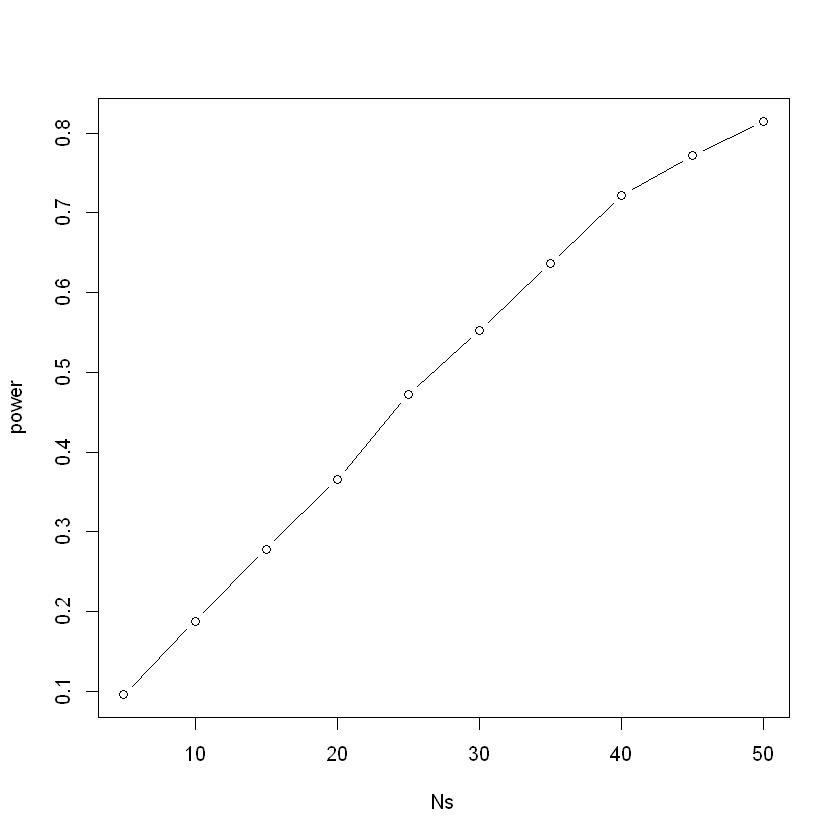

In [15]:
plot(Ns,power,type='b')

In [16]:
#As you can see, Power increases with a larger N value, 
#alpha values (rejection thresholds) alter power as well

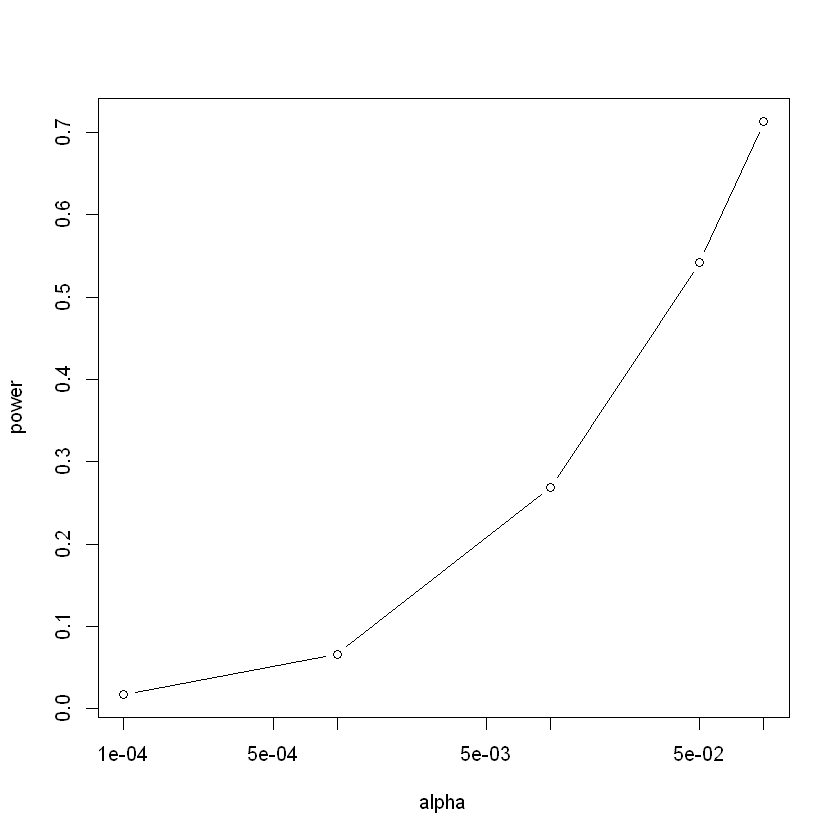

In [18]:
N <- 30
alphas <- c(0.1,0.05,0.01,0.001,0.0001)
power <- sapply(alphas, function(alpha){
    rejections <- replicate(B,reject(N,alpha=alpha))
    mean(rejections)
})

plot(alphas,power,xlab='alpha', type='b',log='x')

In [2]:
#P-values are arbitrary when null hypothesis is NOT true
#aka the Alternative hypothesis is true
#(The difference between population means is NOT zero)
#When Alt. Hyp. is true, we can make p-calue smaller by
#increasing the sample size
calcPval <- function(N) {
    hf<-sample(hfPop, N)
    control <- sample(controlPop, N)
    t.test(hf,control)$p.value
}

In [11]:
Ns <- seq(10,200,by=10)
#generate 10 of each iteration (ten 10s, ten 20s,etc.)
Ns_rep <- rep(Ns, each=10)
pvalues <- sapply(Ns_rep, calcPval)

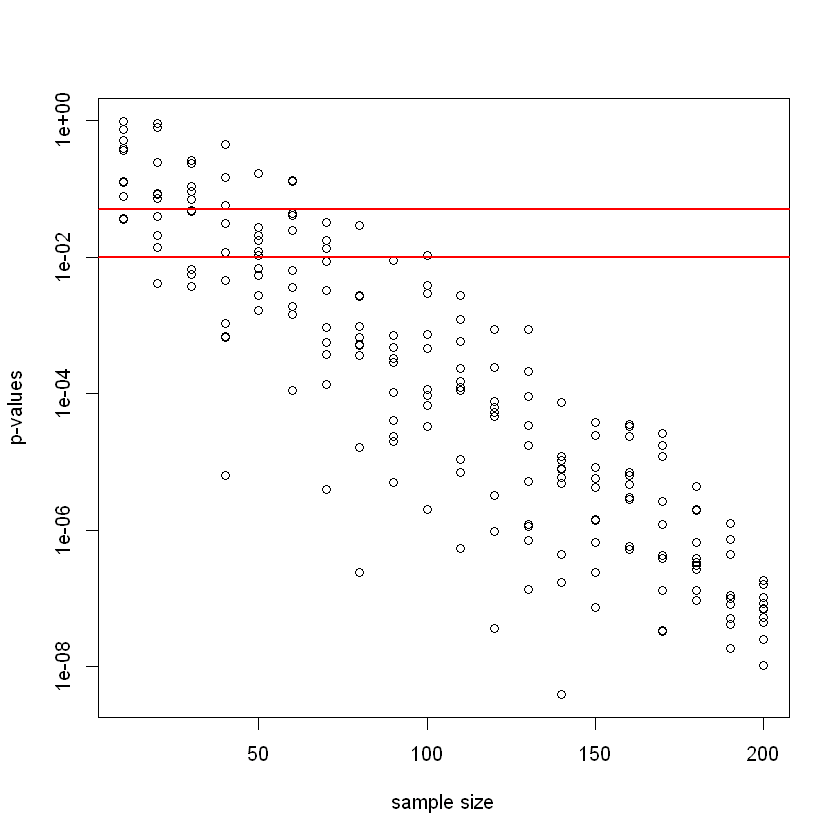

In [15]:
plot(Ns_rep, pvalues, log='y', xlab='sample size',
    ylab='p-values')
abline(h=c(.01,.05),col='red',lwd=2)

In [34]:
#It isn't necessary to shrink p-values by a lot,
#If null is rejected at a reasonable threshold,
#a smaller p-val just means more samples were used than were
#needed
#Larger sample sizes are useful, but this isnt relevant to 
#how small we can make the p-value

#This is why a Confidence Interval is useful with effect size
#to give a sense of change on a reasonable scale

#We can give effect size as a % 
N <- 12
hf <- sample(hfPop,N)
control <- sample(controlPop, N)
diff <- mean(hf) - mean(control)
effect_size <- diff/mean(control) * 100
effect_size


[1] 1.702389

In [35]:
t.test(hf,control)$conf.int / mean(control) * 100

[1] -11.48172  14.88650
attr(,"conf.level")
[1] 0.95

In [40]:
#Cohens d39
#How many standard deviations the hf mean is from the chow mean
#Under alt. hyp. the effect size and cohens d 
#will become more precise
sd_pool <- sqrt(((N-1)*var(hf) + (N-1)*var(control))/(2*N - 2))
diff/ sd_pool

[1] 0.1101007